<br>
<br>
<h1 align="center">Data Pre processing and Feacture Extraction or selction </h1>
<br>
<br>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

<br>
<br>
<h1 align="center">Feacture Extraction or selction 
</h1>
<hr>
<br>
<br>

In [6]:
# importing dataset
df=pd.read_csv('cleaned_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289,0,0,172,0,0.0,1.0,0
1,1,49,0,3,160,180,0,0,156,0,1.0,2.0,1
2,2,37,1,2,130,283,0,1,98,0,0.0,1.0,0
3,3,48,0,4,138,214,0,0,108,1,1.5,2.0,1
4,4,54,1,3,150,195,0,0,122,0,0.0,1.0,0


In [8]:
# removing extra column from cleaned dataset
del df['Unnamed: 0']

In [9]:
df.shape

(918, 12)

In [10]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope               float64
target                   int64
dtype: object

<br>
<h3>Converting Dataset into Input and output feature</h3>
<hr>

<br>

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X.shape

(918, 11)

In [13]:
y.shape

(918,)

<br>
<br>
<h1 align="center">Data Preprocessing 
</h1>
<hr>
<br>
<br>

<br>
<h3>Spliting the dataset into trainig and testing</h3>
<hr>

<br>

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [16]:
X_train.shape

(826, 11)

In [17]:
X_test.shape

(92, 11)

In [18]:
print(X_train)

     age  sex  chest pain type  resting bp s  cholesterol  \
34    43    0                2           150          186   
144   56    0                2           120          279   
308   58    1                4           115            0   
839   35    0                4           138          183   
358   38    1                3           115            0   
..   ...  ...              ...           ...          ...   
835   54    1                4           110          239   
192   48    1                2           130          245   
629   57    0                4           128          303   
559   64    1                4           134          273   
684   47    1                3           108          243   

     fasting blood sugar  resting ecg  max heart rate  exercise angina  \
34                     0            0             154                0   
144                    0            0             150                0   
308                    1            0        

In [19]:
X_test

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
306,55,1,4,115,0,1,0,155,0,0.1,2.0
711,66,1,4,120,302,0,2,151,0,0.4,2.0
298,51,1,4,110,0,1,0,92,0,0.0,2.0
466,55,1,3,120,0,0,1,125,1,2.5,2.0
253,62,1,2,140,271,0,0,152,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
158,44,1,4,130,290,0,0,100,1,2.0,2.0
500,65,1,4,136,248,0,0,140,1,4.0,2.0
880,52,1,3,172,199,1,0,162,0,0.5,1.0
798,42,0,4,102,265,0,2,122,0,0.6,2.0


<br>
<br>
<h1 align="center">Impelemention a ANN(Artificial Neural Network)</h1>
<br>
<br>
<hr>

In [21]:
ann = Sequential()

### Adding hidden Layer

In [22]:
ann.add(Dense(units =128, activation = "relu"))

### Adding hidden Layer

In [23]:
ann.add(Dense(activation = "relu", units =128))

### Adding Output layer

In [24]:
ann.add(Dense(activation = "sigmoid", units = 1))

### Adding optimizar

In [25]:
ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'] )

### Trainig a Model

In [26]:
model = ann.fit(X_train , y_train , batch_size =32 ,epochs = 150 ,use_multiprocessing=True)

Epoch 1/150
26/26 [==============================] - 1s 3ms/step - loss: 1.2336 - accuracy: 0.6235
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 0.7507 - accuracy: 0.6901
Epoch 3/150
26/26 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.7203
Epoch 4/150
26/26 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.7324
Epoch 5/150
26/26 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.6646
Epoch 6/150
26/26 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7155
Epoch 7/150
26/26 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.7167
Epoch 8/150
26/26 [==============================] - 0s 3ms/step - loss: 0.6229 - accuracy: 0.7155
Epoch 9/150
26/26 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7482
Epoch 10/150
26/26 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.7058
Epoch 11/

26/26 [==============================] - 0s 4ms/step - loss: 0.3506 - accuracy: 0.8499
Epoch 84/150
26/26 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8414
Epoch 85/150
26/26 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8196
Epoch 86/150
26/26 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8087
Epoch 87/150
26/26 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8620
Epoch 88/150
26/26 [==============================] - 0s 4ms/step - loss: 0.3483 - accuracy: 0.8511
Epoch 89/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8438
Epoch 90/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8402
Epoch 91/150
26/26 [==============================] - 0s 3ms/step - loss: 0.3748 - accuracy: 0.8499
Epoch 92/150
26/26 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8232
Epoch 93/150


In [27]:
y_pred =ann.predict(X_test)
y_pred = y_pred > 0.5

3/3 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

83.69565217391305

### Confusion Matrix

In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[27, 13],
       [ 2, 50]])

In [31]:
b=ann.predict([[40,1,2,140,289,0,0,172,0,2.0,1]])
print(b)

1/1 [==============================] - 0s 81ms/step
[[0.3521482]]


In [32]:
if b[0] >= 0.5:
    print(1)
else:
    print(0)

0


In [33]:
c=ann.predict([[49,0,3,160,180,0,0,156,0,1.0,2]])

1/1 [==============================] - 0s 38ms/step


In [34]:
print(c)

[[0.49346635]]


In [35]:
d = ann.predict([[49,3,3,140,180,1,1,156,1,1.0,2]])

1/1 [==============================] - 0s 36ms/step


In [36]:
if d[0] >=0.5:
    print(1)
else:
    print(0)

1


In [37]:
ann.predict([[54,1,3,150,195,0,0,122,0,0.0,1.0]])

1/1 [==============================] - 0s 38ms/step


array([[0.18816692]], dtype=float32)

In [38]:
ann.predict([[49,1,1,150,170,1,1,156,1,1.0,2.0]])

1/1 [==============================] - 0s 63ms/step


array([[0.91364384]], dtype=float32)

In [39]:
ann.predict([[37,1,2,130,283,0,1,98,0,0.0,1.0]])

1/1 [==============================] - 0s 38ms/step


array([[0.15670992]], dtype=float32)

In [40]:
ann.predict([[54,1,3,150,195,0,0,122,0,0.0,1.0]])

1/1 [==============================] - 0s 37ms/step


array([[0.18816692]], dtype=float32)

In [41]:
ann.predict([[48,0,4,138,214,0,0,108,1,1.5,2.0]])

1/1 [==============================] - 0s 40ms/step


array([[0.9469778]], dtype=float32)

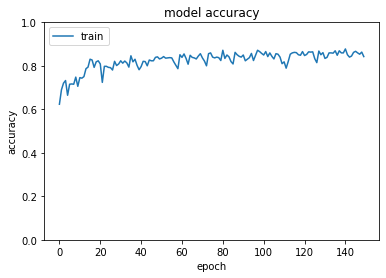

In [42]:
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

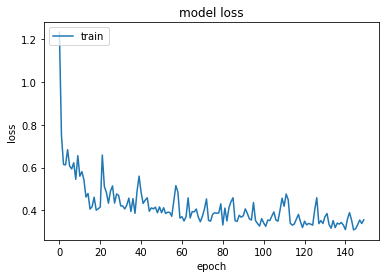

In [43]:
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# import pickle

In [ ]:
# pickle.dump(ann , open('heart.pkl','wb'))